# Analytics Vidhya Competition
## Machine Learning Starter Program Hackathon

**Data Point**

|Variable|Description|
|--------|-----------|
|id | Unique ID |
|program_id | ID for program |
|program_type | Type of program |
|program_duration | Program duration in days |
|test_id | test ID |
|test_type | Type of test (offline/online) |
|difficulty_level | Difficulty level of test |
|trainee_id | ID for trainee |
|gender | Gender of trainee |
|education | Education Level of trainee |
|city_tier | Tier of city of residence for  trainee |
|age | Age of trainee |
|total_programs_enrolled | Total Programs Enrolled by trainee |
|is_handicapped | Does trainee suffer from a disability? |
|trainee_engagement_rating | Instructer/teaching assistant provided trainee engagement rating for the course |
|is_pass | 0 - test failed, 1 -  test passed |

**The Objective**

Your client is a multi-national financial company, which offers multiple products to the consumers. There are multiple channels to offer these products to consumers although major contribution is coming from offline distribution channel. Offline channel sells Financial products to consumers via their agent network and as per government regulation these agents must be certified to sell financial products. There are multiple certification programs against different categories of financial products. 

As this offline channel shares major contribution to total company sales, company focuses on recruitment and certify them to build large agent network. Here, major challenge is training them to get the certifications to sell various type of products.

You are given a dataset of trainee performance for the training curriculum test wise within multiple programs. Your task is to predict the performance on such tests given the demographic information and training program/test details. This will enable your client to strengthen its training problem by figuring out the most important factors that lead to a better engagement and performance for a trainee.

## 1. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
print('Total Row:',train.shape[0])
print('Total Column:',train.shape[1])
train.head()

Total Row: 73147
Total Column: 16


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [5]:
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


---

## 2. Data Wrangling

**Check Missing Value**

In [6]:
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

**Input missing value using Iterative Imputer**

In [8]:
impute = IterativeImputer(random_state=23)

In [9]:
col_miss = ['age','trainee_engagement_rating']
train[col_miss] = impute.fit_transform(train[col_miss])

In [10]:
train.isnull().sum().sum()

0

---

**Check Duplicate Column ID**

In [11]:
train['id'].duplicated().sum()

0

If not exist, then drop the id column because it's not useful for machine learning model.

In [12]:
train.drop(columns='id',axis=1,inplace=True)

In [13]:
train.nunique()

program_id                      22
program_type                     7
program_duration                10
test_id                        188
test_type                        2
difficulty_level                 4
trainee_id                   18500
gender                           2
education                        5
city_tier                        4
age                             51
total_programs_enrolled         13
is_handicapped                   2
trainee_engagement_rating       20
is_pass                          2
dtype: int64

In [14]:
train.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.000000,5,N,1.0,0
1,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.000000,2,N,3.0,1
2,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.000000,1,N,2.0,1
3,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,34.750169,4,N,1.0,1
4,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.000000,2,N,4.0,1


In [15]:
print(train['trainee_engagement_rating'].unique())
print(train['age'].unique())

[1.         3.         2.         4.         5.         2.67455711
 2.39556109 2.76074025 1.94200036 1.81272564 2.89001497 2.8469234
 2.02818351 2.07127508 1.76963407 1.89890879 2.24364138 1.98509194
 2.80383183 2.63146553]
[24.         26.         40.         34.75016885 42.         29.
 48.         45.         37.29443574 28.         38.56656919 39.83870264
 36.0223023  43.         27.         32.         44.         41.
 23.         38.         30.         46.         25.         31.
 34.         56.         47.         33.         22.         59.
 49.         21.         18.         35.         36.         50.
 55.         39.         51.         20.         19.         54.
 58.         57.         37.         52.         53.         36.52550879
 17.         63.         60.        ]


There weird on columns age and trainee_engagement_rating. On the column age, for example, you can't possibly have an age 36,022. And on the column trainee_engagement_rating, the rating must be on integer number not float. So I change both of the columns to integer.

In [16]:
train[['trainee_engagement_rating','age']] = train[['trainee_engagement_rating','age']].astype(int)

In [17]:
train['trainee_engagement_rating'].value_counts()

1    25614
2    17292
4    13113
3    11553
5     5575
Name: trainee_engagement_rating, dtype: int64

In [18]:
train['age'].value_counts()

34    9550
36    6597
38    5701
37    4774
45    4043
44    3723
28    3211
43    3136
27    3005
46    2990
29    2730
26    2445
30    2169
39    2151
42    2023
47    1999
25    1904
31    1602
41    1243
24    1240
48    1207
32     969
23     699
49     651
33     595
40     562
22     400
50     276
21     269
56     213
35     210
57     196
51     166
20      89
55      70
58      64
52      61
19      60
18      45
17      35
53      30
54      25
59      16
63       2
60       1
Name: age, dtype: int64

---

Encode the categorical columns, so it can be read by machine learning model.

In [19]:
dfc = train.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
encode = LabelEncoder()

In [21]:
cols = ['program_id','program_type','test_type', 'difficulty_level','gender', 'education','is_handicapped']

In [22]:
dfc[cols] = dfc[cols].apply(encode.fit_transform)

In [23]:
print(dfc.shape)
dfc.head()

(73147, 15)


,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,15,5,136,150,0,2,9389,1,3,3,24,5,0,1,0
1,2,1,131,44,0,0,16523,0,1,4,26,2,0,3,1
2,20,6,120,178,1,0,13987,1,3,1,40,1,0,2,1
3,3,1,117,32,0,0,13158,0,3,3,34,4,0,1,1
4,10,3,131,84,0,2,10591,0,1,1,42,2,0,4,1


In [24]:
dfc.describe()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000
mean,10.827129,3.268227,128.208676,91.079306,0.404719,0.791229,9843.079620,0.533761,1.585273,2.246845,36.345687,2.583934,0.089819,2.394958,0.695408
std,5.994345,1.817236,6.889679,51.239048,0.490841,0.949212,5703.556093,0.498862,1.147639,1.011587,7.203284,1.240816,0.285924,1.324828,0.460238
min,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000
25%,5.000000,1.000000,121.000000,45.000000,0.000000,0.000000,5040.000000,0.000000,1.000000,1.000000,30.000000,2.000000,0.000000,1.000000,0.000000
50%,11.000000,3.000000,131.000000,90.000000,0.000000,0.000000,9641.000000,1.000000,1.000000,2.000000,36.000000,2.000000,0.000000,2.000000,1.000000
75%,16.000000,5.000000,134.000000,135.000000,1.000000,2.000000,14552.000000,1.000000,3.000000,3.000000,43.000000,3.000000,0.000000,4.000000,1.000000
max,21.000000,6.000000,136.000000,187.000000,1.000000,3.000000,20098.000000,1.000000,4.000000,4.000000,63.000000,14.000000,1.000000,5.000000,1.000000


---

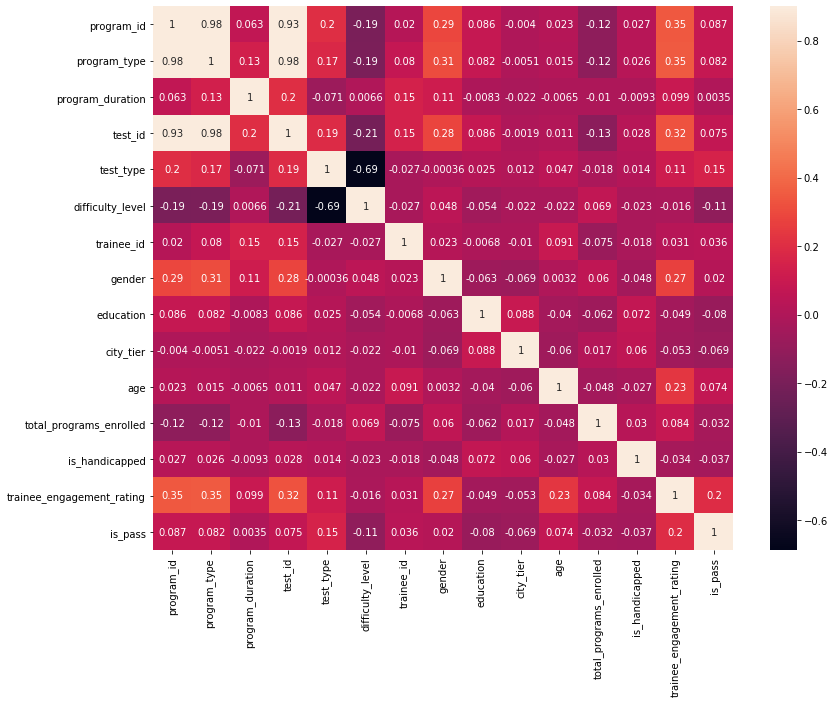

In [25]:
cor = dfc.corr()
plt.figure(figsize=(13,10))
sns.heatmap(cor,vmax=0.9,annot=True)
plt.show()

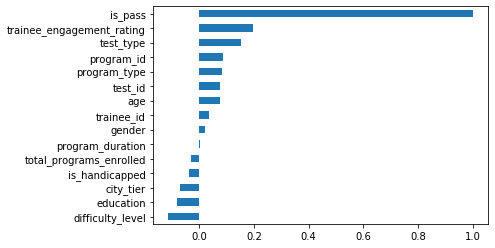

In [26]:
shw = cor['is_pass'].sort_values()
shw.plot(kind='barh')
plt.show()

Based on correlation plot above, I decided to put off gender, program_duration, program_type columns.

In [27]:
dfc.drop(columns=['gender','program_duration','program_type'],axis=1,inplace=True)

---

In [28]:
x = dfc.drop('is_pass',axis=1)
y = dfc['is_pass']

In [29]:
ohe = OneHotEncoder(drop='first')

In [30]:
trans = make_column_transformer((ohe,['difficulty_level', 'education', 'city_tier',
                                      'total_programs_enrolled', 'trainee_engagement_rating']), 
                                remainder='passthrough')

In [31]:
x = trans.fit_transform(x)

In [32]:
#If you want to get back the columns.

#feat = ohe.fit_transform(x[['difficulty_level', 'education', 'city_tier',
#                            'total_programs_enrolled', 'trainee_engagement_rating']]).toarray()
#get_feat = ohe.get_feature_names(['difficulty_level', 'education', 'city_tier',
#                                  'total_programs_enrolled', 'trainee_engagement_rating'])
#feat_new = pd.DataFrame(data=feat,columns=get_feat)
#feat_new = feat_new.astype(int)
#
#x = pd.concat([x,feat_new],axis=1,join='inner')
#x.drop(columns=['difficulty_level', 'education', 'city_tier',
#                         'total_programs_enrolled', 'trainee_engagement_rating'],axis=1,inplace=True)
#x.head()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

### Handling Imbalanced Dataset

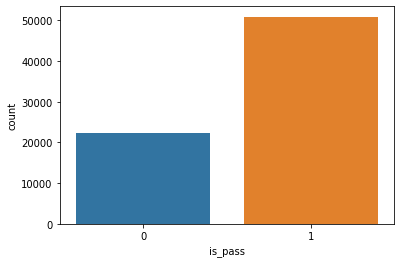

In [34]:
sns.countplot(x='is_pass',data=dfc)
plt.show()

In [35]:
import imblearn

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE()
x_train_sm,y_train_sm = smote.fit_sample(x_train,y_train)

In [38]:
from collections import Counter

In [39]:
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({1: 40788, 0: 17729})
Counter({1: 40788, 0: 40788})


---

### 3. Data Modelling

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import roc_auc_score, classification_report

In [42]:
kfold = KFold(n_splits=10,shuffle=True,random_state=23)

In [43]:
def cv_score(model):
    return cross_val_score(model,x_train,y_train,cv=kfold,scoring='roc_auc')
def cv_score_sm(model):
    return cross_val_score(model,x_train_sm,y_train_sm,cv=kfold,scoring='roc_auc')

In [44]:
#Model 1: Logistic Regression
log_mod = LogisticRegression(solver='liblinear')
print(cv_score(log_mod).mean())
print(cv_score_sm(log_mod).mean())

0.6115884401359392
0.6782363482514929


In [45]:
#Model 2: Decision Tree
dt_mod = DecisionTreeClassifier()
print(cv_score(dt_mod).mean())
print(cv_score_sm(dt_mod).mean())

0.6474979338576154
0.7811265662385198


#### Ensembel Method

In [46]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [73]:
#Model 1: Ada Boost
ada_mod = AdaBoostClassifier()
print(cv_score(ada_mod).mean())
print(cv_score_sm(ada_mod).mean())

0.6935064465237422
0.8389014268275534


In [118]:
#Model 2: Random Forest
rf_mod = RandomForestClassifier()
print(cv_score(rf_mod).mean())
print(cv_score_sm(rf_mod).mean())

0.7660309575585622
0.89904245912265


In [75]:
#Model 3: Gradient Boost
gb_mod = GradientBoostingClassifier()
print(cv_score(gb_mod).mean())
print(cv_score_sm(gb_mod).mean())

0.7122232100371118
0.8553251266662045


In [154]:
#Model 4: XGBoost
xgb_mod = xgb.XGBClassifier()
print(cv_score(xgb_mod).mean())
print(cv_score_sm(xgb_mod).mean())

0.7635468816365881
0.8853928446219674


---

#### Test Model

In [146]:
xgb_mod.fit(x_train_sm,y_train_sm)
pred4 = xgb_mod.predict(x_test)
print(roc_auc_score(y_test,pred4))

0.6585099881884551


### Tuning Selected Model

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
params = {'min_child_weight':np.arange(1,10),
          'max_depth':np.arange(5,26),
          'learning_rate':[0.1,0.15,0.2,0.25],
          'gamma':[0,0.1,0.2,0.3],
          'colsample_bytree':[0.6,0.7,0.8,0.9],
          'subsample':[0.6,0.7,0.8,0.9]
          }

In [49]:
xgb_mod = xgb.XGBClassifier()
rand = RandomizedSearchCV(xgb_mod,param_distributions=params,scoring='roc_auc',cv=kfold)

In [51]:
rand.fit(x_train_sm,y_train_sm)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
            

In [52]:
rand.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 23,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.9}

In [53]:
rand.best_score_

0.9118764885130748

#### Test Tuning Model

In [50]:
tune_xgb = xgb.XGBClassifier( min_child_weight = 1,
                              max_depth = 23,
                              learning_rate = 0.2,
                              gamma = 0.2,
                              colsample_bytree = 0.9,
                              subsample = 0.8
                            )

In [51]:
tune_xgb.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=23,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [52]:
tune_pred = tune_xgb.predict(x_test)
print(roc_auc_score(y_test,tune_pred))

0.6881840774951058


### Fit the model using all data point

In [53]:
x_new, y_new = smote.fit_resample(x,y)

In [54]:
tune_xgb.fit(x_new,y_new)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=23,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

### Predict Unseen Data

**Perform the same thing as train data on test data.**

In [55]:
test = pd.read_csv('test.csv')

In [56]:
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


Collect sample submission data.

In [57]:
sample_sub = pd.read_csv('sample_submission_vaSxamm.csv')

In [58]:
test.drop('id',axis=1,inplace=True)

In [59]:
test[['age','trainee_engagement_rating']] = impute.fit_transform(test[['age','trainee_engagement_rating']])

In [60]:
test[['trainee_engagement_rating','age']] = test[['trainee_engagement_rating','age']].astype(int)

In [61]:
test[cols] = test[cols].apply(encode.fit_transform)

In [62]:
test.drop(columns=['gender','program_duration', 'program_type'],axis=1,inplace=True)

In [63]:
test_trans = make_column_transformer((ohe,['difficulty_level', 'education', 'city_tier',
                                           'total_programs_enrolled', 'trainee_engagement_rating']), 
                                           remainder='passthrough')

In [64]:
test = test_trans.fit_transform(test)

In [65]:
validation_model = tune_xgb.predict(test)

In [66]:
sample_sub.head()

,id,is_pass
0,1626_45,0
1,11020_130,0
2,12652_146,0
3,7038_72,0
4,888_71,0


Fit the prediction into sample submission data.

In [67]:
sample_sub['is_pass'] = validation_model

In [68]:
sample_sub.head()

,id,is_pass
0,1626_45,1
1,11020_130,1
2,12652_146,0
3,7038_72,0
4,888_71,1


Create New CSV file for uploading into Competition Submission.

In [69]:
sample_sub.to_csv('final_submission_tune.csv',index=False)

**Note :**

In this competition, I used the XGBoost model and got a score of **0.7068048721** which placed me in the **top 4% (53th Place) from other 1718 competitors.** But actually, Random Forest model works a little better compared to XGBoost. However, I prefer to choose the XGBoost Model because the length of the training process on the Random Forest Model on my PC. I know this competition is not as difficult as the Kaggle platform. But, I am quite happy to be in the top 4% cause this is also the first competition for me after about 5 months of learning about Data Science and Machine Learning.